In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from mpl_toolkits import mplot3d

In [4]:
df = pd.read_csv('../Datasets/games-features.csv')

df = df[['MovieCount','ScreenshotCount',
         'PriceFinal','SteamSpyOwners',
         'PriceCurrency','PriceInitial']]

df['log_owners'] = np.log(df['SteamSpyOwners'])
df['log_movie'] = np.log(df['MovieCount'])
df['log_screenshot'] = np.log(df['ScreenshotCount'])
df['log_price'] = np.log(df['PriceFinal'])

df_drop0 = df[df['SteamSpyOwners'] > 0]

#drop MovieCount = 0
df_drop0_all_mov = df[(df['SteamSpyOwners'] > 0) & (df['MovieCount'] > 0)]
df_drop0_mov = df[df['MovieCount'] > 0]

#drop ScreenshotCount = 0
df_drop0_all_ss = df[(df['SteamSpyOwners'] > 0) & (df['ScreenshotCount'] > 0)]
df_drop0_ss = df[df['ScreenshotCount'] > 0]

#drop PriceFinal = 0
df_drop0_all_price = df[(df['SteamSpyOwners'] > 0) & (df['PriceFinal'] > 0)]
df_drop0_price = df[df['PriceFinal'] > 0]


/Users/melchisedec/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df.head()

,MovieCount,ScreenshotCount,PriceFinal,SteamSpyOwners,PriceCurrency,PriceInitial,log_owners,log_movie,log_screenshot,log_price
0,0,13,9.99,13033334,USD,9.99,16.383021,-inf,2.564949,2.301585
1,0,5,4.99,5399140,USD,4.99,15.501750,-inf,1.609438,1.607436
2,0,5,4.99,7621102,USD,4.99,15.846432,-inf,1.609438,1.607436
3,0,4,4.99,7498965,USD,4.99,15.830276,-inf,1.386294,1.607436
4,0,5,4.99,5399499,USD,4.99,15.501817,-inf,1.609438,1.607436


## MovieCount and log MovieCount Dist.

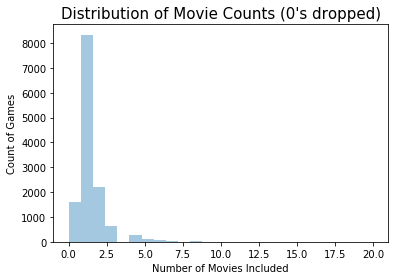

In [9]:
sns.distplot(df['MovieCount'], bins = 25, kde = False)
plt.title('Distribution of Movie Counts (0\'s dropped)', fontsize = 15)
plt.xlabel('Number of Movies Included')
plt.ylabel('Count of Games')
plt.show()

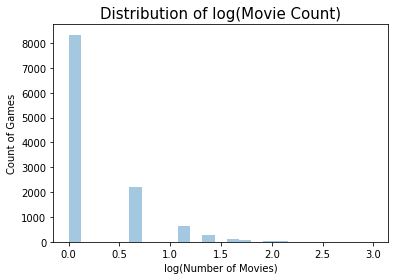

In [11]:
sns.distplot(df_drop0_mov['log_movie'], bins = 25, kde = False)
plt.title('Distribution of log(Movie Count)', fontsize = 15)
plt.xlabel('log(Number of Movies)')
plt.ylabel('Count of Games')
plt.show()

In [22]:
#Linear Regression Test for MovieCount
outcome, predictors = patsy.dmatrices('log_owners ~ log_movie', df_drop0_all_mov)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     448.0
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           2.86e-97
Time:                        02:45:18   Log-Likelihood:                -20894.
No. Observations:                9793   AIC:                         4.179e+04
Df Residuals:                    9791   BIC:                         4.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6405      0.024    400.784      0.0

R^2 score:  0.04532602281465048


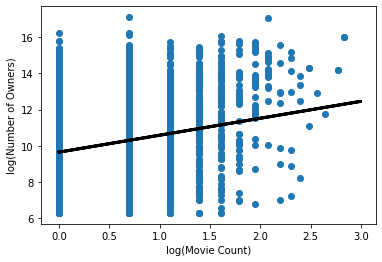

In [23]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_all_mov['log_movie']), 
                                                    np.array(df_drop0_all_mov['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('log(Movie Count)')
plt.ylabel('log(Number of Owners)')
plt.show()

In [24]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [9.64978116]
Coefficients: 
 [[0.93538402]]


In [26]:
#mean_squared_error(y_test, predicted)

## ScreenshotCount and log ScreenshotCount Dist.

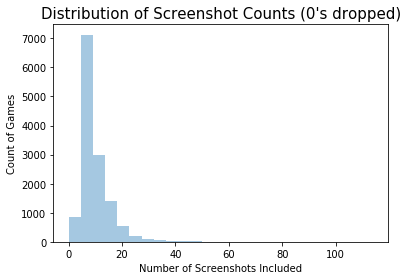

In [13]:
sns.distplot(df['ScreenshotCount'], bins = 25, kde = False)
plt.title('Distribution of Screenshot Counts (0\'s dropped)', fontsize = 15)
plt.xlabel('Number of Screenshots Included')
plt.ylabel('Count of Games')
plt.show()

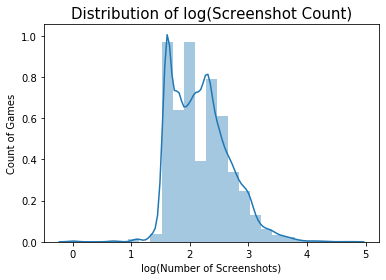

In [15]:
sns.distplot(df_drop0_ss['log_screenshot'], bins = 25)
plt.title('Distribution of log(Screenshot Count)', fontsize = 15)
plt.xlabel('log(Number of Screenshots)')
plt.ylabel('Count of Games')
plt.show()

In [27]:
#Linear Regression Test for ScreenshotCOunt
outcome, predictors = patsy.dmatrices('log_owners ~ log_screenshot', df_drop0_all_ss)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     223.7
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           4.55e-50
Time:                        02:52:01   Log-Likelihood:                -22815.
No. Observations:               10604   AIC:                         4.563e+04
Df Residuals:                   10602   BIC:                         4.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.6067      0.094     91.

R^2 score:  0.020665396964124727


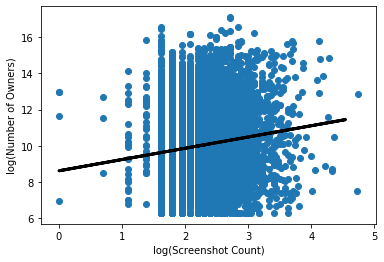

In [29]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_all_ss['log_screenshot']), 
                                                    np.array(df_drop0_all_ss['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('log(Screenshot Count)')
plt.ylabel('log(Number of Owners)')
plt.show()

In [30]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [8.61812229]
Coefficients: 
 [[0.62228499]]


## PriceFinal and log of PriceFinal Dist.

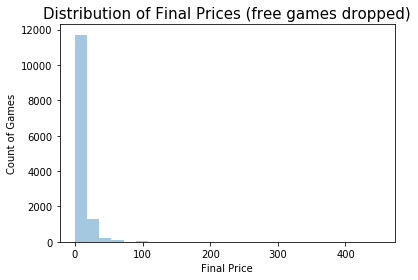

In [17]:
sns.distplot(df['PriceFinal'], bins = 25, kde = False)
plt.title('Distribution of Final Prices (free games dropped)', fontsize = 15)
plt.xlabel('Final Price')
plt.ylabel('Count of Games')
plt.show()

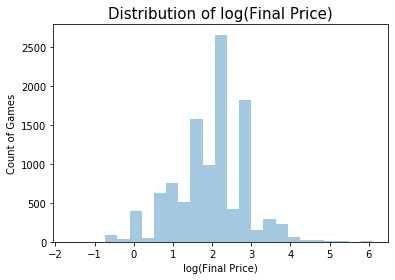

In [19]:
sns.distplot(df_drop0_price['log_price'], bins = 25, kde = False)
plt.title('Distribution of log(Final Price)', fontsize = 15)
plt.xlabel('log(Final Price)')
plt.ylabel('Count of Games')
plt.show()

In [31]:
#Linear Regression Test for PriceFinal
outcome, predictors = patsy.dmatrices('log_owners ~ log_price', df_drop0_all_price)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     242.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           6.65e-54
Time:                        02:54:09   Log-Likelihood:                -19519.
No. Observations:                9248   AIC:                         3.904e+04
Df Residuals:                    9246   BIC:                         3.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1570      0.051    177.973      0.0

R^2 score:  0.025116107985657776


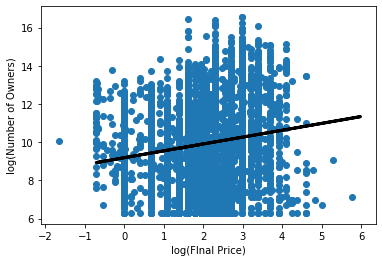

In [32]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df_drop0_all_price['log_price']), 
                                                    np.array(df_drop0_all_price['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.xlabel('log(FInal Price)')
plt.ylabel('log(Number of Owners)')
plt.show()

In [33]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [9.18717955]
Coefficients: 
 [[0.35920102]]
